In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
%matplotlib

import sys
sys.executable

'c:\\Data\\Projects\\phd\\cdl\\env\\Scripts\\python.exe'

In [2]:
from dino.environments.playground import PlaygroundEnvironment
from exlab.interface.graph import display
env = PlaygroundEnvironment()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Windows (64bit) [c:\Data\Projects\phd\cdl\env\lib\site-packages\pymunk\chipmunk.dll]
2020-09-22 15:11:50 BlackSky exlogger:c[33152] INFO [modular] Module 'PlaygroundEnvironment' has been started


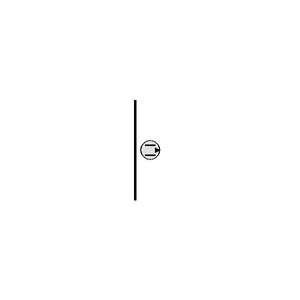

In [3]:
# env.displayGui(True)
env.image()

In [4]:
from cdl.agents.learners.curiosity.saggriac import SAGGLearner
learner = SAGGLearner(env.world.findHost())

2020-09-22 15:11:54 BlackSky exlogger:c[33152] INFO [modular] Module 'ModelDataset' has been started
2020-09-22 15:11:54 BlackSky exlogger:c[33152] INFO [modular] Module 'ModelDataset' has been started
2020-09-22 15:11:54 BlackSky exlogger:c[33152] INFO [modular] Module 'Agent' has been started
2020-09-22 15:11:54 BlackSky exlogger:c[33152] INFO [modular] Module 'Performer' has been started
2020-09-22 15:11:54 BlackSky exlogger:c[33152] INFO [modular] Module 'planner' has been started
2020-09-22 15:11:54 BlackSky exlogger:c[33152] INFO [modular] Module 'ModelDataset' has been attached to 'Agent'
2020-09-22 15:11:54 BlackSky exlogger:c[33152] INFO [modular] Module 'InterestModelManager' has been started
2020-09-22 15:11:54 BlackSky exlogger:c[33152] INFO [modular] Module 'Strategy autonomousStrategy' has been started
2020-09-22 15:11:54 BlackSky exlogger:c[33152] INFO [modular] Module 'Strategy autonomousStrategy' has been started


In [5]:
from cdl.agents.tools.models.interest_model import InterestModel
mnc = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), register=False)
# InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('#Cylinder1.position'), learner.propertySpace('#Cylinder1.positionToAgent'))

In [6]:
mnc.contextColumns(None, None)

In [6]:
mc = InterestModel(learner.dataset, learner.propertySpace('Agent.move'), learner.propertySpace('Agent.position'), learner.propertySpace('Agent.lidar'))

2020-09-22 15:11:56 BlackSky exlogger:c[33152] INFO [model] New model added: Model(@☰#4↝🕹'#Agent.move'↕2 | @☰#9↝👁'#Agent.lidar':PRE↕8 => @☰#5↝👁'#Agent.position'↕2)


In [8]:
mc.contextSpacialization.columns(None)

array([False, False, False, False, False, False, False, False])

In [9]:
# from dino.data.contextarea import ContextSpatialization, ContextArea
# cs = ContextSpatialization(learner.dataset.models[0], learner.propertySpace('Agent.position'))

In [10]:
# cs._addArea(ContextArea(cs, cs.space.point([10, 10])))

In [11]:
# cs.findArea(cs.space.point([10, 10]))

In [12]:
# from exlab.modular.logger import Logger, logger, logging
# logger().setRecordLevel(Logger.DEBUG2, 'performer')
# logger().setDisplayLevel(Logger.DEBUG2, 'performer')
# logger().setRecordLevel(Logger.DEBUG2, 'strategy')
# logger().setDisplayLevel(Logger.DEBUG2, 'strategy')
# logger().setRecordLevel(Logger.DEBUG2, 'plan')
# logger().setDisplayLevel(Logger.DEBUG2, 'plan')
# logger().display(tag='plan')

In [186]:
learner.train(50)

In [187]:
env.run()

Should del context column 5 (+-0.0003616528192402768) around Observation[#5↝👁'#Agent.position'↕2 @☰± 41.487,  50.758]
Conflict trying to update current area, creating a new one
Should del context column 5 (+0.0011575397947943822) around Observation[#5↝👁'#Agent.position'↕2 @☰± 23.731,  23.673]
Conflict trying to update current area, creating a new one
2020-09-22 16:10:32 BlackSky exlogger:c[33152] INFO [interest] Splitting along dim 5: 14.6904 for Region @☰∥#11⇉👁[↝👁'#Agent.position' ↝👁'#Agent.lidar']↕10
    Left: None
    <Cut 5d 14.6904 #10>
    Right: None


In [197]:
display(mc.contextSpacialization.visualizeAreas())

[  3   5   6   8  18  22  23  32  36  38  40  45  47  48  51  52  61  62
  69  72  78  82  87  92  96  97 101 106 108 112 121 125 130 131 137 138
 139 142 144 145 146 148 151 155 159 166 167 175 179 183 189 191 195 202
 206 208 211 213 214 217 226 228 230 234 242 251 254 256 260 267 268 272
 281 288 300 303 306 308 313 315 326 331 336 342 343 345 348 351 355 360
 364 371 372 373 378 391 395 408 412 414 417 427 428 429 432 436 437 440
 457 466 471 475 494 499 502 505 521 522 524 526 528 530 533 537 539 541
 545 548 549 551 553 561 572 577 583 588 591 598 606 608 610]
[  1   4  13  14  15  16  17  30  49  50  55  86  90  94  99 104 111 115
 118 120 124 140 141 169 172 177 178 182 187 201 205 207 209 212 218 223
 224 227 233 235 239 244 245 247 258 263 270 271 273 275 278 280 285 294
 297 307 309 319 324 325 327 334 339 349 356 363 377 389 390 396 400 413
 425 431 438 446 450 454 458 468 478 489 490 491 492 493 500 501 532 540
 550 560 562 563 567 570 571 584 590 593 596 612 613 614]
[  0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [189]:
[area.columns for area in mc.contextSpacialization.areas]

[array([False, False, False, False, False,  True, False, False]),
 array([False, False, False, False, False, False, False, False]),
 array([False, False, False,  True, False, False, False, False]),
 array([False, False, False, False, False,  True, False, False]),
 array([False, False, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False])]

In [23]:
mc.contextSpace.data[:200, 0]

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 10

In [19]:
learner.reach(learner.propertySpace('Agent.position').point([100, 100]).setRelative(False))

In [13]:
learner.reach(learner.propertySpace('#Cylinder1.position').point([500, 200]).setRelative(False))

In [16]:
learner.propertySpace('Agent.position').point([0, 0])

Data[#6↝👁'#Agent.position'↕2 @☰± 0.000,  0.000]

In [18]:
env.world.observe()

Observation[Observation[#0→👁'#Agent.position'↕2 @± 362.759,  305.029]
    Observation[#1→👁'#Agent.positionToAgent'↕2 @± 0.000,  0.000]
    Observation[#2→👁'#Agent.lidar'↕8 @± 100.000,  100.000,  100.000,  100.000,  100.000,  100.000,  100.000,  100.000]]

In [11]:
env.iteration

200

In [18]:
learner.iteration

3

In [69]:
learner.dataset.spaces[0].number

512

In [70]:
learner.dataset.spaces[0].data

array([[ 0.32286985, -0.19646247],
       [ 0.37222594,  0.07765963],
       [ 0.2425151 , -0.68859405],
       ...,
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [20]:
env.iteration

11

In [29]:
print(mc)
print(mnc)

Model(@☰#4↝🕹'#Agent.move'↕2 | @☰#9↝👁'#Agent.lidar':PRE↕8 => @☰#5↝👁'#Agent.position'↕2)
Model(@☰#4↝🕹'#Agent.move'↕2 | @NullSpace => @☰#5↝👁'#Agent.position'↕2)


In [192]:
mnc.competence(precise=True)

0.7627940699812723

In [193]:
mc.competence(precise=True)

0.9865840288174422

<bound method ContextSpatialization.columns of <dino.data.contextarea.ContextSpatialization object at 0x000001F4990EA670>>

In [9]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('Agent.position').visualizeData())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
display(learner.propertySpace('Agent.move').visualizeData(), learner.propertySpace('#Cylinder1.position').visualizeData())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
learner.propertySpace('#Cylinder1.position')

@☰#14↝👁'#Cylinder1.position'↕2

In [26]:
im = list(learner.dataset.models[0].interestMaps.values())[0]
display(im.visualizeData())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
im

Region @☰#6↝👁'#Agent.position'↕2
    Left: Region @☰#6↝👁'#Agent.position'↕2
        Left: None
        <Cut Noned 0.0000 #2>
        Right: None
    <Cut 0d -12.0612 #2>
    Right: Region @☰#6↝👁'#Agent.position'↕2
        Left: Region @☰#6↝👁'#Agent.position'↕2
            Left: None
            <Cut Noned 0.0000 #2>
            Right: None
        <Cut 0d -9.9797 #2>
        Right: Region @☰#6↝👁'#Agent.position'↕2
            Left: Region @☰#6↝👁'#Agent.position'↕2
                Left: Region @☰#6↝👁'#Agent.position'↕2
                    Left: None
                    <Cut Noned 0.0000 #2>
                    Right: None
                <Cut 1d -19.2330 #2>
                Right: Region @☰#6↝👁'#Agent.position'↕2
                    Left: None
                    <Cut Noned 0.0000 #2>
                    Right: None
            <Cut 0d 13.9845 #2>
            Right: Region @☰#6↝👁'#Agent.position'↕2
                Left: None
                <Cut Noned 0.0000 #2>
                Right: N